### 훈련 세트와 테스트 세트 나누어 사용하기

In [48]:
# 도미의 길이, 도미의 특성성

bream_length= [25.4,26.3,26.5,29.0,29.0,29.7,29,7,30.0,30.0,30.7,
            31.0,31.0,31.5,32.0,32.0,33.0,33.0,33.5,33.5,34.0,34.0,34.5,
            35.0,35.0,35.0,35.0,36.0,36.0,36.0,37.0,38.5,39.0,41.0,41.0]
bream_weight = [242.0,290.0,340.0,363.0,430.0,450.0,500.0,390.0,
                450.0,500.0,475.0,500.0,500.0,340.0,600.0,600.0,
                700.0,700.0,610.0,650.0,575.0,685.0,620.0,680.0,
                700.0,725.0,720.0,714.0,850.0,1000.0,920.0,955.0,
                925.0,975.0,950.0]

# 빙어 데이터

smelt_length = [9.8,10.5,10.6,11.0,11.2,11.3,11.8,11.8,12.0,12.2,
                12.4,13.0,14.3,15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,13.4,
                12.2,19.7,19.9]

In [49]:
# 리스트 형태 데이터 합치기.
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 사이킷 런을 사용하기위해 2차원 배열로 변형
fish_data = [[l,w] for l,w in zip(length,weight)]

# 정답 준비 (지도 학습)
# 1 : 도미, 0 : 빙어
fish_target = [1]*35 + [0]*14

In [50]:
# 훈련 데이터와 테스트 데이터로 나누기

train_input = fish_data[:35]
train_target= fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [51]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input,train_target)

kn.score(test_input,test_target)
# 정확도 0% -> 14개를 모두 못맞춤
# 이유 : 35개, 14개 나눈 데이터에 훈련 데이터에는 도미 데이터,
# 테스트 데이터에는 빙어 데이터만 들어있기에, 학습은 도미만 해서
# 빙어 데이터를 하나도 맞추지 못한것.

# 샘플링이 편향 됨

0.0

# 넘파이 사용해서 데이터 섞기

In [52]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

# 1차원 배열 : 벡터
# 2차월 배열 : 행렬

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.   500. ]
 [   7.   390. ]
 [  30.   450. ]
 [  30.   500. ]
 [  30.7  475. ]
 [  31.   500. ]
 [  31.   500. ]
 [  31.5  340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  36.  1000. ]
 [  37.   920. ]
 [  38.5  955. ]
 [  39.   925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [53]:
# 0~ 48까지 정수 배열 생성
index = np.arange(49)

# np.random.shuffle()을 이용해 정수 배열 무작위로 섞기
np.random.shuffle(index)

train_input=input_arr[index[:35]]
train_target=target_arr[index[:35]]

test_input=input_arr[index[35:]]
test_target=target_arr[index[35:]]

# 데이터 나누고 확인하기

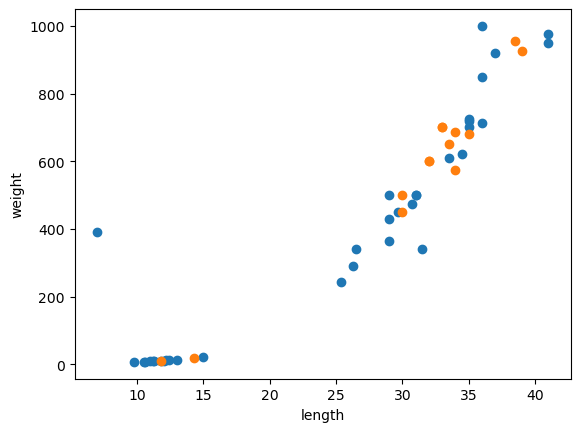

In [ ]:
import matplotlib.pyplot as plt

# 2차원 배열이니 모든 행을 표현하는 : 와 0번째 열을 표현
# train_input[:, 1] -> 모든 행과 index가 1인 열
plt.scatter(train_input[:, 0],train_input[:, 1])
plt.scatter(test_input[:, 0],test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 데이터를 섞은 후 다시 학습 및 평가
kn = kn.fit(train_input,train_target)

kn. score(test_input,test_target)

1.0